<a href="https://colab.research.google.com/github/m-rafiul-islam/driver-behavior-model/blob/main/LHS_PRCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latin Hypercube Sampling & Partial Rank Correlation Coefficients  <br/> *~ a method for analyzing model sensitivity to parameters ~*

#### Importing packages that will be used.

In [77]:
import numpy as np

from scipy import special

import random

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import pandas as pd

import matplotlib.pyplot as plt


### Specify the number of parameters to sample and the number of samples to draw from each parameter distribution. 
#### *Do not include any parameters that should be left fixed in parameterCount - those will be specified later. When choosing number of samples to draw, note that more samples (~ 1000) yields better results while fewer (~50) is faster for testing, since it requires fewer model solves.* 

In [78]:
# Number of parameters to sample 
parameterCount = 4;
# Number of samples to draw for each parameter
sampleCount = 100; # 1000 plus

#### This defines functions for specifying sampled parameters' names and distributions  as well as drawing samples from a user-specified parameter distribution. Does not need any user edits.

In [79]:
def parNameDist(Name,Distribution):
    paramTemp = {}
    paramTemp['Name']=Name
    paramTemp['Dist']=Distribution
    
    return paramTemp
  
def sampleDistrib(modelParamName,distrib,distribSpecs): 
    
    if distrib == 'uniform':
        
        mmin = distribSpecs[0].value
        mmax = distribSpecs[1].value
        
        intervalwidth = (mmax - mmin) / sampleCount      # width of each 
                                                         # sampling interval
        samples = []
        
        for sample in range(sampleCount):
            
            lower = mmin + intervalwidth * (sample-1)    # lb of interval
            upper = mmin + intervalwidth * (sample)      # ub of interval
            
            sampleVal = np.random.uniform(lower, upper)  # draw a random sample 
                                                         # within the interval
            samples.append(sampleVal)

    
    
    elif distrib == 'normal':
        
        mmean= distribSpecs[0].value
        mvar = distribSpecs[1].value
        
        lower = mvar*np.sqrt(2)*special.erfinv(-0.9999)+mmean # set lb of 1st
                                                              # sample interval
        samples = []
        
        for sample in range(sampleCount):
          
            n = sample + 1
            
            if n != sampleCount:
                upper = (np.sqrt(2*mvar)*special.erfinv(2*n/sampleCount-1)
                         + mmean)                        # ub of sample interval
            else:
                upper = np.sqrt(2*mvar)*special.erfinv(0.9999) + mmean
 
            sampleVal = np.random.uniform(lower, upper)  # draw a random sample 
                                                         # within the interval
    
            samples.append(sampleVal)

            lower = upper           # set current ub as the lb for next interval
            

    
    elif distrib == 'triangle':
        
        mmin = distribSpecs[0].value
        mmax = distribSpecs[1].value
        mmode= distribSpecs[2].value
    
        samples = []
        
        for sample in range(sampleCount):
          
            n = sample + 1
            
            intervalarea = 1/sampleCount 
            
            ylower = intervalarea*(n-1) # use cdf to read off area as y's &
            yupper = intervalarea*(n)   # get corresponding x's for the pdf
        
        
            # Check to see if y values = cdf(x <= mmode) 
            # for calculating correxponding x values:
            
            if ylower <= ((mmode - mmin)/(mmax - mmin)):     
                lower = np.sqrt(ylower*(mmax - mmin)*(mmode - mmin)) + mmin 

            else:
                lower = mmax-np.sqrt((1 - ylower)*(mmax - mmin)*(mmax - mmode))

            
            if yupper <= ((mmode - mmin)/(mmax - mmin)):    
                upper = np.sqrt(yupper*(mmax - mmin)*(mmode - mmin)) + mmin; 

            else:
                upper = mmax-np.sqrt((1 - yupper)*(mmax - mmin)*(mmax - mmode))

                
            sampleVal = np.random.uniform(lower, upper)  
            
            samples.append(sampleVal)
            
    
    b = int(np.ceil(sampleCount/10))
    plt.hist(samples, density = 1, bins = b) 
    
    B=str(b)
    
    plt.title('Histogram of ' + modelParamName 
              + ' parameter samples for ' + B + ' bins')
    
    plt.ylabel('proportion of samples');
    plt.xlabel(modelParamName + ' value')
    
    plt.show()
    
    return samples

#### Calls the function to ask for user input to name parameters and specify distributions. 
### Type these in text input boxes and dropdowns that will appear below after running the cell.

In [80]:
params = {}

for i in range(parameterCount):
  
    s=str(i)
    
    params[i] = interactive(parNameDist,
                            Name='Type parameter ' + s + ' name', 
                            Distribution=['uniform','normal','triangle'])
    
    display(params[i])

interactive(children=(Text(value='Type parameter 0 name', description='Name'), Dropdown(description='Distribut…

interactive(children=(Text(value='Type parameter 1 name', description='Name'), Dropdown(description='Distribut…

interactive(children=(Text(value='Type parameter 2 name', description='Name'), Dropdown(description='Distribut…

interactive(children=(Text(value='Type parameter 3 name', description='Name'), Dropdown(description='Distribut…

### Input parameter distribution specifics in the interactive boxes that appear below after running this cell.

In [81]:
distribSpecs={}

for i in range(parameterCount):
  
    parName = params[i].result['Name']
    
    print('Enter distribution specifics for parameter ' + parName + ':')
    
    if params[i].result['Dist'] == 'normal':

        distribSpecs[parName] = {}
        
        distribSpecs[parName][0] = widgets.FloatText(
                value=2,
                description='Mean:'
              )
        distribSpecs[parName][1] = widgets.FloatText(
                value=1,
                description='Variance:'
              )

        display(distribSpecs[parName][0], distribSpecs[parName][1])

    elif params[i].result['Dist'] == 'uniform':

        distribSpecs[parName] = {}

        distribSpecs[parName][0] = widgets.FloatText(
                value=0,
                description='Minimum:'
              )
        distribSpecs[parName][1] = widgets.FloatText(
                value=2,
                description='Maximum:'
              )

        display(distribSpecs[parName][0], distribSpecs[parName][1])


    elif params[i].result['Dist'] == 'triangle':
      
        distribSpecs[parName] = {}

        distribSpecs[parName][0] = widgets.FloatText(
                value=0,
                description='Minimum:'
              )
        distribSpecs[parName][1] = widgets.FloatText(
                value=2,
                description='Maximum:'
              )
        distribSpecs[parName][2] = widgets.FloatText(
                value=1,
                description='Mode:'
              )

        display(distribSpecs[parName][0], distribSpecs[parName][1], distribSpecs[parName][2])

Enter distribution specifics for parameter a:


FloatText(value=0.0, description='Minimum:')

FloatText(value=2.0, description='Maximum:')

Enter distribution specifics for parameter b:


FloatText(value=0.0, description='Minimum:')

FloatText(value=2.0, description='Maximum:')

Enter distribution specifics for parameter beta:


FloatText(value=0.0, description='Minimum:')

FloatText(value=2.0, description='Maximum:')

Enter distribution specifics for parameter delta:


FloatText(value=0.0, description='Minimum:')

FloatText(value=2.0, description='Maximum:')

In [83]:
# parameter of interest 
a=1.5 
b = 1.64
delta =  4.0
beta = 2 
lf = 0.50
uf = 2 
varbound=np.array([[a*lf,a*uf],[b*lf,b*uf],[lf*delta,uf*delta],[lf*beta,uf*beta]])
varbound

array([[0.75, 3.  ],
       [0.82, 3.28],
       [2.  , 8.  ],
       [1.  , 4.  ]])

#### This passes the distributions to the code for generating parameter samples, and histogram plots of samples for each parameter will appear below. 

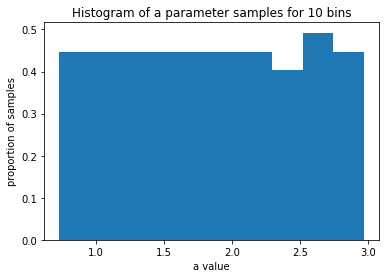

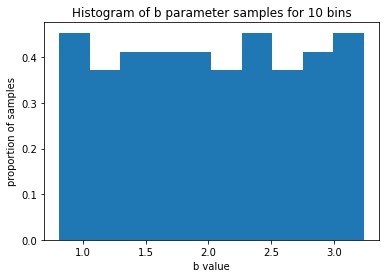

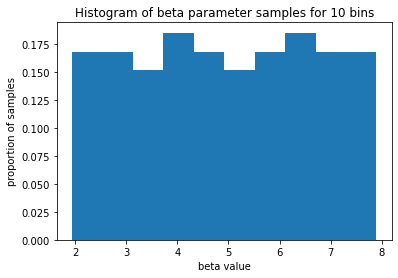

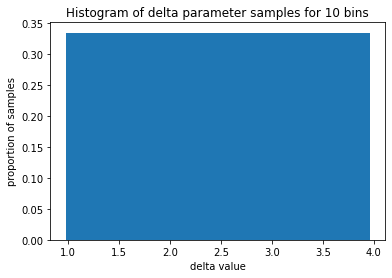

In [84]:
parameters = {}
for j in range(parameterCount):
  
    parameters[params[j].result['Name']] = sampleDistrib(params[j].result['Name'],
                                                         params[j].result['Dist'],
                                                         distribSpecs[params[j].result['Name']])

#### Randomly permute each set of parameter samples in order to randomly pair the samples to more fully sample the parameter space for the Monte Carlo simulations.

In [85]:
LHSparams=[]
for p in parameters:
    temp = parameters[p]
    random.shuffle(temp)
    LHSparams.append(temp) 

In [60]:
# parameters
# LHSparams

###Our IDM/FIDM model 

#### packages

In [86]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 24 15:17:39 2022
@author: rafiul
"""
# import scipy.integrate as integrate
# from scipy.integrate import odeint 
import sys
import os 
# from geneticalgorithm import geneticalgorithm as ga
#from geneticalgorithm_pronto import geneticalgorithm as ga
# from ga import ga
import numpy as np
import scipy.integrate as integrate
from scipy import special 
from scipy.interpolate import interp1d
import pandas as pd  


#### Functions

In [87]:

def RK4(func, X0, ts):
        """
        Runge Kutta 4 solver.
        """
        dt = ts[1] - ts[0]
        nt = len(ts)
        X  = np.zeros((nt, X0.shape[0]),dtype=np.float64)
        X[0] = X0
        for i in range(nt-1):
            k1 = func(X[i], ts[i])
            k2 = func(X[i] + dt/2. * k1, ts[i] + dt/2.)
            k3 = func(X[i] + dt/2. * k2, ts[i] + dt/2.)
            k4 = func(X[i] + dt    * k3, ts[i] + dt)
            X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
        return X 


#  see this link for model and paramterts https://en.wikipedia.org/wiki/Intelligent_driver_model  
# DOI: 10.1098/rsta.2010.0084 

# @jit(nopython=True)
def idm_model(x,t):
    X,V = x[0],x[1]
    dX,dV = np.zeros(1,dtype=np.float64), np.zeros(1,dtype=np.float64)
    dX = V # Differtial Equation 1
    ###
    s = position_LV(t) - X - 5 # 5 = length of the car
    deltaV = V - speed_LV(t)
    sstar = s0+V*T + (V*deltaV)/(2*np.sqrt(a*b))
    # ###
    dV = a*(1-(V/V_0)**delta - (sstar/s)**2) # Differtial Equation 2
    
    return np.array([dX,dV],dtype=np.float64) 


# @jit(nopython=True)

def speed_LV(t):
    return interp1d(nth_car_data['time'],nth_car_data['speed'],bounds_error=False)(t) 

def position_LV(t):
    return interp1d(nth_car_data['time'],postion_of_the_LV,bounds_error=False)(t)  


def fractional_idm_model_1d(V,t,X):    
    # index = round(t) #convert into integer number 
    
    current_position_of_follower = X 
    ###
    s = position_LV(t) - current_position_of_follower - 5 # 5 = length of the car
    deltaV = V - speed_LV(t)
    sstar = s0+V*T + (V*deltaV)/(2*np.sqrt(a*b))
    
    # ###
    dV = a*(1-(V/V_0)**delta - (sstar/s)**2) # Differtial Equation 2
    
    return dV

def speed_error(sol,nth_car_speed):
    return np.sum((sol[1,:-1]-nth_car_speed[1:])**2) 

def gap_error(sol,postion_of_the_LV):
    return np.sum((sol[0,:]-postion_of_the_LV)**2) 

def caputoEuler_1d(a, f, y0, tspan, x0_f):
    """Use one-step Adams-Bashforth (Euler) method to integrate Caputo equation
    D^a y(t) = f(y,t)
    Args:
      a: fractional exponent in the range (0,1)
      f: callable(y,t) returning a numpy array of shape (d,)
         Vector-valued function to define the right hand side of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      FODEValueError
    See also:
      K. Diethelm et al. (2004) Detailed error analysis for a fractional Adams
         method
      C. Li and F. Zeng (2012) Finite Difference Methods for Fractional
         Differential Equations
    """
    #(d, a, f, y0, tspan) = _check_args(a, f, y0, tspan)
    N = len(tspan)
    h = (tspan[N-1] - tspan[0])/(N - 1)
    c = special.rgamma(a) * np.power(h, a) / a
    w = c * np.diff(np.power(np.arange(N), a))
    fhistory = np.zeros(N - 1, dtype=np.float64)
    y = np.zeros(N, dtype=np.float64)
    x = np.zeros(N, dtype=np.float64)
    y[0] = y0;
    x[0] = x0_f;
    for n in range(0, N - 1):
        tn = tspan[n]
        yn = y[n]
        fhistory[n] = f(yn, tn, x[n])
        y[n+1] = y0 + np.dot(w[0:n+1], fhistory[n::-1])
        x[n+1] = x[n] + y[n+1] * h
    return np.array([x,y]) 

def error_func_idm(variable_X):
    # varbound=np.array([[a*lf,a*uf],[lf*delta,uf*delta],[lf*beta,uf*beta]])
    a = variable_X[0]
    delta = variable_X[1] 
    beta = variable_X[2] 
    x0 = np.array([initial_position,initial_velocity],dtype=np.float64) #initial position and velocity
    # Classical ODE
    # sol = integrate.odeint(idm_model, x0, time_span) 
    
    sol = RK4(idm_model, x0, time_span) 
    sol = sol.transpose(1,0) 
    
    # print(np.sum((sol[1,:-1]-nth_car_speed[1:])**2))
    
    return np.sum((sol[1,1:]-nth_car_speed[:-1])**2) 
  
def error_func_fidm(variable_X):
    # varbound=np.array([[a*lf,a*uf],[lf*delta,uf*delta],[lf*beta,uf*beta]])
    a = variable_X[0]
    delta = variable_X[1] 
    beta = variable_X[2] 
    alpha = variable_X[3]
    if alpha > .99999:
        alpha = .99999
    sol = caputoEuler_1d(alpha,fractional_idm_model_1d, initial_velocity, time_span, initial_position) #, args=(number_groups,beta_P,beta_C,beta_A,v,w,mu_E,mu_A,mu_P,mu_C,p,q,contact_by_group))
    return np.sum((sol[1,1:]-nth_car_speed[:-1])**2) 


In [66]:
# np.array(Output).reshape(len(Output),1)

#### Run Monte Carlo simulations for each parameter sample set.
### *Be sure to specify a call to your model function and any necessary arguments below.* 


In [88]:
######################################

# Global  variables 

#  see this link for model and paramterts https://en.wikipedia.org/wiki/Intelligent_driver_model 

V_0 = 20  # desired speed m/s 
s0 = 30
T = 1.5 
nth_car = 2


# a=1.5
# b = 1.67 
# delta =  4.0
# beta = 2 

# find best values for our model
# a_alpha = 1.2 


# ######################################
# Actual data 
# df = pd.read_csv('RAllCarDataTime350.csv') 
git_raw_url = 'https://raw.githubusercontent.com/m-rafiul-islam/driver-behavior-model/main/RAllCarDataTime350.csv'
df = pd.read_csv(git_raw_url) 
nth_car_data = df.loc[df['nthcar'] == nth_car, :]  
nth_car_speed = np.array(df.loc[df['nthcar'] == nth_car,'speed'])  


# leader vehicle profile 
# 7 m/s - 25.2 km/h  11 m/s - 39.6 km/h  18 m/s - 64.8 km/h 22 m/s - 79.2 km/h 
# 25 km/h -- 6.95 m/s 40 km/h -- 11.11 m/s 60 km/h -- 16.67 m/s 
# dt=1 #time step -- 1 sec 

time_span = np.array(nth_car_data['time'])
dt = time_span[1]-time_span[0]

# speed_of_the_LV = 15*np.ones(600+1) # we will need data

# speed_of_the_LV = np.concatenate((np.linspace(0,7,60),7*np.ones(120),np.linspace(7,11,60), 11*np.ones(120), np.linspace(11,0,60) ))# we will need data

speed_of_the_LV = nth_car_speed

num_points = len(speed_of_the_LV) 

postion_of_the_LV = np.zeros(num_points) 


initla_position_of_the_LV = 18.45  # 113 

postion_of_the_LV[0] = initla_position_of_the_LV

for i in range(1,num_points):
      
      postion_of_the_LV[i] = postion_of_the_LV[i-1] + dt*(speed_of_the_LV[i]+speed_of_the_LV[i-1])/2 
 
initial_position = 0.
initial_velocity = 6.72
x0 = np.array([initial_position,initial_velocity],dtype=np.float64) #initial position and velocity

alpha =1 
# a=1.5
b = 1.67 
# delta =  4.0
# beta = 2 
Output = [] 
for j in range(sampleCount):   
    sampledParams=[i[j] for i in LHSparams] 
    SSE = error_func_idm(sampledParams)
    Output.append(SSE)

### Plot the range of simulation output generated by the all of the Monte Carlo simulations using errorbars.

In [71]:
# yavg = np.mean(Output, axis=0)
# yerr = np.std(Output, axis=0)
# plt.errorbar(t,yavg,yerr)
# plt.xlabel('x')
# # plt.xlabel('time (days)')   # for myodes
# plt.ylabel(labelstring)
# plt.title('Error bar plot of ' + labelstring + ' from LHS simulations')
# plt.show()

### Compute partial rank correlation coefficients to compare simulation outputs with parameters

In [89]:
# 
LHSout = np.hstack((LHSarray,np.array(Output).reshape(len(Output),1)))
SampleResult = LHSout.tolist()

Ranks=[]
              
for s in range(sampleCount):

    indices = list(range(len(SampleResult[s])))
    indices.sort(key=lambda k: SampleResult[s][k])
    r = [0] * len(indices)
    for i, k in enumerate(indices):
        r[k] = i

    Ranks.append(r)

  
C=np.corrcoef(Ranks);

if np.linalg.det(C) < 1e-16: # determine if singular
    Cinv = np.linalg.pinv(C) # may need to use pseudo inverse
else:
    Cinv = np.linalg.inv(C) 

resultIdx = parameterCount+1
prcc=np.zeros(resultIdx)

for w in range(parameterCount): # compute PRCC btwn each param & sim result
    prcc[w]=-Cinv[w,resultIdx]/np.sqrt(Cinv[w,w]*Cinv[resultIdx,resultIdx]) 

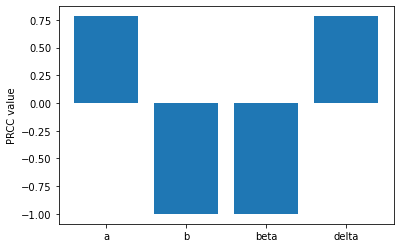

In [90]:
xp=[i for i in range(parameterCount)]

plt.bar(xp,prcc[0:parameterCount], align='center')

bLabels=list(parameters.keys())
plt.xticks(xp, bLabels) 

plt.ylabel('PRCC value');
plt.show() 